In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Callable Distribution Functions

In [ ]:
def get_distribution(var):
  return listings.groupby(var).price.describe().sort_values(by="50%", ascending=False)

# Callable Plotting Functions

In [ ]:
def plot_pricing_distribution(var): # function to return frequency histogram plot (counts)

  plt.figure(figsize=(10,6))
  groups = listings[var].unique()

  for group in groups:
    subset = listings[listings[var] == group]
    plt.hist(subset.price, bins=30, alpha=0.8, density=False, label=group)


  plt.title(f"Price Distribution Grouped by {var.upper().replace("_"," ")}")
  plt.xlabel("Price ($)")
  plt.ylabel("Count")
  plt.xlim(0,850)
  plt.legend(title=var.title().replace("_"," "), bbox_to_anchor=(1.02, 1))
  plt.show()


In [ ]:
# includes legend and labels for each grouping
def plot_pricing_dist_v2(var):
  fig, ax = plt.subplots(figsize=(10,6))
  for name, data in listings.groupby(var): # returns the NAME of GROUP (key) and all instances belonging to GROUP (data)
    s = pd.to_numeric(data.price, errors='coerce' # tells python to replace price with NaN if can't be converted
                      ).dropna()
    # skipping groups with approximately zero variance
    if s.size < 2 or s.nunique() < 2:
      continue
    ax.hist(s, bins=30, density=False, alpha=0.8, label=str(name), edgecolor='white')

  ax.set_title(f"Price Distribution by {var.upper().replace("_"," ")}")
  ax.set_xlabel("Price ($)")
  ax.set_ylabel("Probability Density")
  ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, title=var.upper().replace("_"," "))
  plt.tight_layout()

  return ax

# May have to take a closer look at above code cell before this script is ready for deployment

# Exploratory Data Analysis

In [ ]:
listings = pd.read_csv('/content/cleaned_listing_v2')

In [ ]:
pd.set_option('display.max_columns', len(listings.columns))

**GOAL**:
1) Understand how PRICE affects demand/sales.
2) Understand WHICH FACTORS of the data determine price sensitivity in the Washington DC Airbnb market.

# Exploratory Data Analysis

In [ ]:
listings.head()

,listing_id,name,description,neighborhood_overview,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,3686,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,Vita,2008-11-26,"I am a literary scholar, teacher, poet, vegan ...",NaN,NaN,100%,False,1.0,4.0,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Historic Anacostia,False,38.86339,-76.98889,Private room in home,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Shampoo"", ""Smoke alarm"", ""Essentials"", ""Stov...",31,365,31.0,365.0,False,True,1,1,1,1,84,0,0,0,0,0,0.0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,False,1,0,1,0,0.48,60.0
1,3943,Historic Rowhouse Near Monuments,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,Vasa,2008-12-12,I travel often and always try to immerse mysel...,within an hour,100%,95%,True,5.0,5.0,"['email', 'phone']",True,True,Neighborhood highlights,"Edgewood, Bloomingdale, Truxton Circle, Eckington",False,38.91195,-77.00456,Private room in townhouse,Private room,2,1.0,1 private bath,1.0,1.0,"[""Luggage dropoff allowed"", ""Window AC unit"", ...",1,1125,1.0,1125.0,False,True,14,44,74,349,534,38,1,278,36,228,14364.0,2009-05-10,2025-02-19,4.86,4.89,4.93,4.94,4.92,4.60,4.77,False,5,0,5,0,2.77,63.0
2,4197,Capitol Hill Bedroom walk to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",Sandra,2008-12-12,I’m a California native who came to work for t...,within an hour,100%,100%,True,2.0,2.0,"['email', 'phone']",True,True,Neighborhood highlights,"Capitol Hill, Lincoln Park",False,38.88719,-76.99472,Private room in home,Private room,1,1.5,1.5 shared baths,1.0,1.0,"[""Luggage dropoff allowed"", ""Fire pit"", ""Shamp...",4,29,4.0,1125.0,False,True,21,47,77,352,64,6,0,281,5,48,6144.0,2009-05-14,2025-01-30,4.87,4.98,4.89,5.00,4.98,4.97,4.93,False,2,0,2,0,0.33,128.0
3,4529,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,Bertina,2008-12-30,I am a retried teacher. I enjoy walking and wa...,NaN,NaN,NaN,False,4.0,4.0,"['email', 'phone']",True,True,Neighborhood highlights,"Eastland Gardens, Kenilworth",False,38.90585,-76.94469,Private room in home,Private room,2,1.0,1 private bath,1.0,2.0,"[""Luggage dropoff allowed"", ""Shampoo"", ""Smoke ...",30,1125,30.0,1125.0,False,True,29,59,89,179,102,0,0,179,0,0,0.0,2009-08-08,2019-07-05,4.66,4.80,4.60,4.93,4.93,4.51,4.83,False,2,0,2,0,0.54,64.0
4,7103,Lovely guest suite in a quiet but close-in nei...,"Private guest suite with cathedral ceiling, su...",NaN,Charlotte,2009-05-18,"My business is LUXbnb, we offer short-stay fur...",within an hour,100%,100%,True,30.0,106.0,"['email', 'phone', 'work_email']",True,True,NaN,"Spring Valley, Palisades, Wesley Heights, Foxh...",False,38.91999,-77.09774,Entire guest suite,Entire

## Distribution of PRICE

In [ ]:
listings.price.describe()

,price
count,4741.000000
mean,158.278422
std,109.670941
min,10.000000
25%,88.000000
50%,131.000000
75%,191.000000
max,836.000000


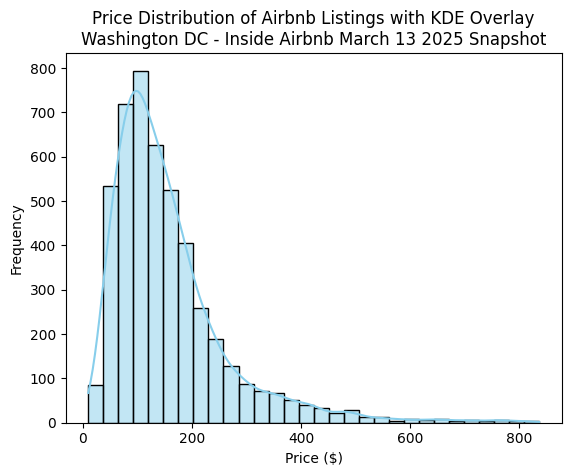

In [ ]:
sns.histplot(data = listings, x='price', kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Price Distribution of Airbnb Listings with KDE Overlay\nWashington DC - Inside Airbnb March 13 2025 Snapshot")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

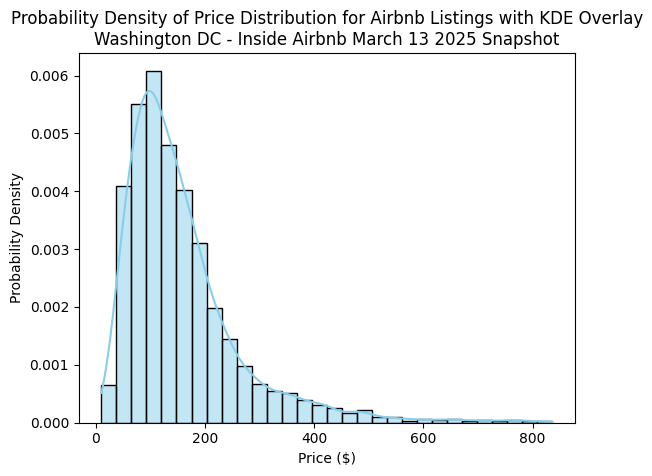

In [ ]:
sns.histplot(
    data=listings,
    x='price',
    kde=True,
    stat='density',
    bins=30,
    color="skyblue",
    edgecolor="black"
)
plt.title('Probability Density of Price Distribution for Airbnb Listings with KDE Overlay\nWashington DC - Inside Airbnb March 13 2025 Snapshot')
plt.xlabel("Price ($)")
plt.ylabel("Probability Density")
plt.show()

## Pricing Distribution across Market Segments

### By Room Type

In [ ]:
listings.groupby("room_type").price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3536.0,176.000566,109.407387,10.0,106.0,145.5,204.00,836.0
Hotel room,59.0,304.559322,156.819496,28.0,213.0,256.0,382.50,704.0
Private room,1134.0,96.348325,75.387562,24.0,50.0,68.0,108.00,650.0
Shared room,12.0,69.333333,36.586966,23.0,50.5,66.0,75.75,142.0


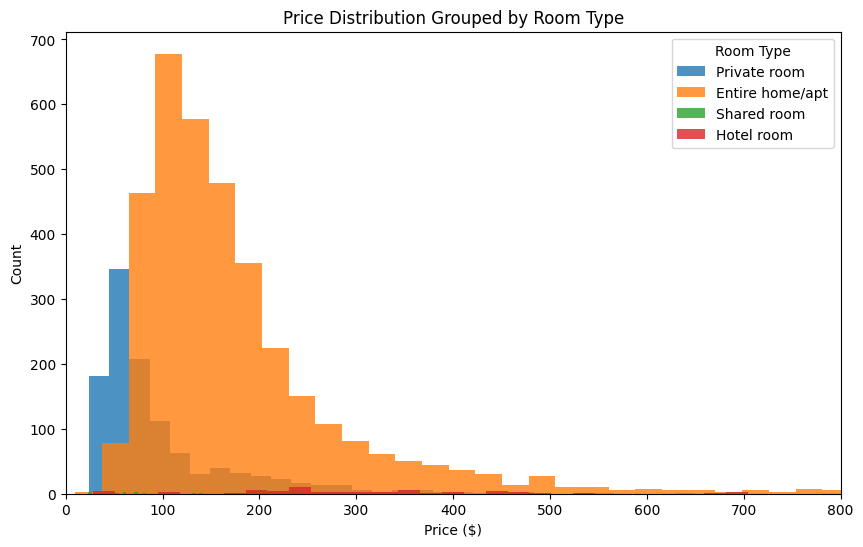

In [ ]:
plt.figure(figsize=(10,6))
room_types = listings.room_type.unique()

for room in room_types:
  subset = listings[listings.room_type == room]
  plt.hist(subset.price, bins=30, alpha=0.8, density=False, label=room)

plt.title("Price Distribution Grouped by Room Type")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.xlim(0,800)
plt.legend(title="Room Type")
plt.show()

### by NEIGHBOURHOOD (CLEANSED)

In [ ]:
listings.groupby('neighbourhood_cleansed').price.describe().sort_values(by="50%", ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street",239.0,246.108787,116.451259,50.0,170.00,220.0,306.00,717.0
"Georgetown, Burleith/Hillandale",131.0,224.664122,132.512096,67.0,135.50,190.0,264.50,736.0
"Cathedral Heights, McLean Gardens, Glover Park",52.0,210.826923,162.748299,40.0,115.00,185.0,243.50,833.0
"West End, Foggy Bottom, GWU",49.0,232.326531,156.279716,50.0,150.00,184.0,285.00,799.0
"Near Southeast, Navy Yard",89.0,189.865169,92.515378,28.0,144.00,171.0,203.00,630.0
"Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point",82.0,211.060976,134.134477,48.0,107.25,169.0,269.50,583.0
"Woodland/Fort Stanton, Garfield Heights, Knox Hill",10.0,157.000000,71.577464,49.0,97.00,167.0,189.75,282.0
"Capitol Hill, Lincoln Park",488.0,180.786885,111.493831,23.0,116.00,155.0,210.00,836.0
"Shaw, Logan Circle",251.0,162.900398,90.823797,48.0,102.00,151.0,194.50,751.0


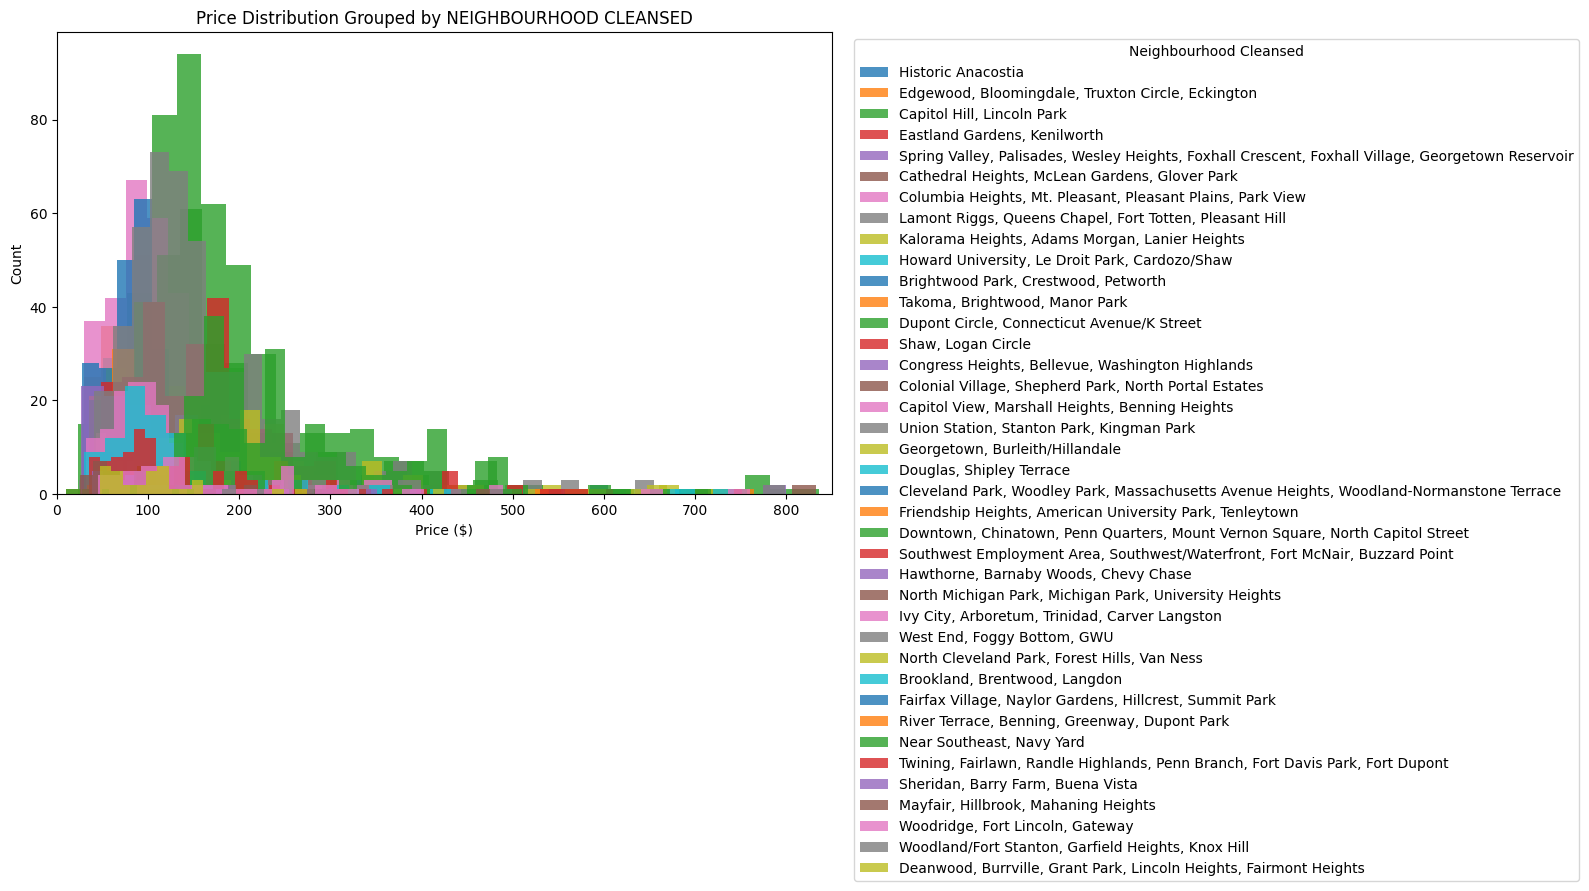

In [ ]:
plot_pricing_distribution('neighbourhood_cleansed');

### By PROPERTY TYPE

In [ ]:
get_distribution("property_type")

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Private room in resort,1.0,403.000000,NaN,403.0,403.00,403.0,403.00,403.0
Entire bungalow,2.0,311.000000,63.639610,266.0,288.50,311.0,333.50,356.0
Room in serviced apartment,2.0,283.000000,239.002092,114.0,198.50,283.0,367.50,452.0
Entire serviced apartment,106.0,306.386792,139.625456,64.0,224.00,260.0,413.00,799.0
Treehouse,1.0,249.000000,NaN,249.0,249.00,249.0,249.00,249.0
Room in hotel,112.0,267.169643,120.371114,66.0,198.00,231.0,281.25,704.0
Private room in bed and breakfast,45.0,219.866667,102.021745,44.0,126.00,221.0,268.00,449.0
Entire townhouse,277.0,234.527076,135.756083,46.0,138.00,199.0,299.00,836.0
Entire home,636.0,230.863208,145.483701,10.0,129.75,187.5,292.50,833.0


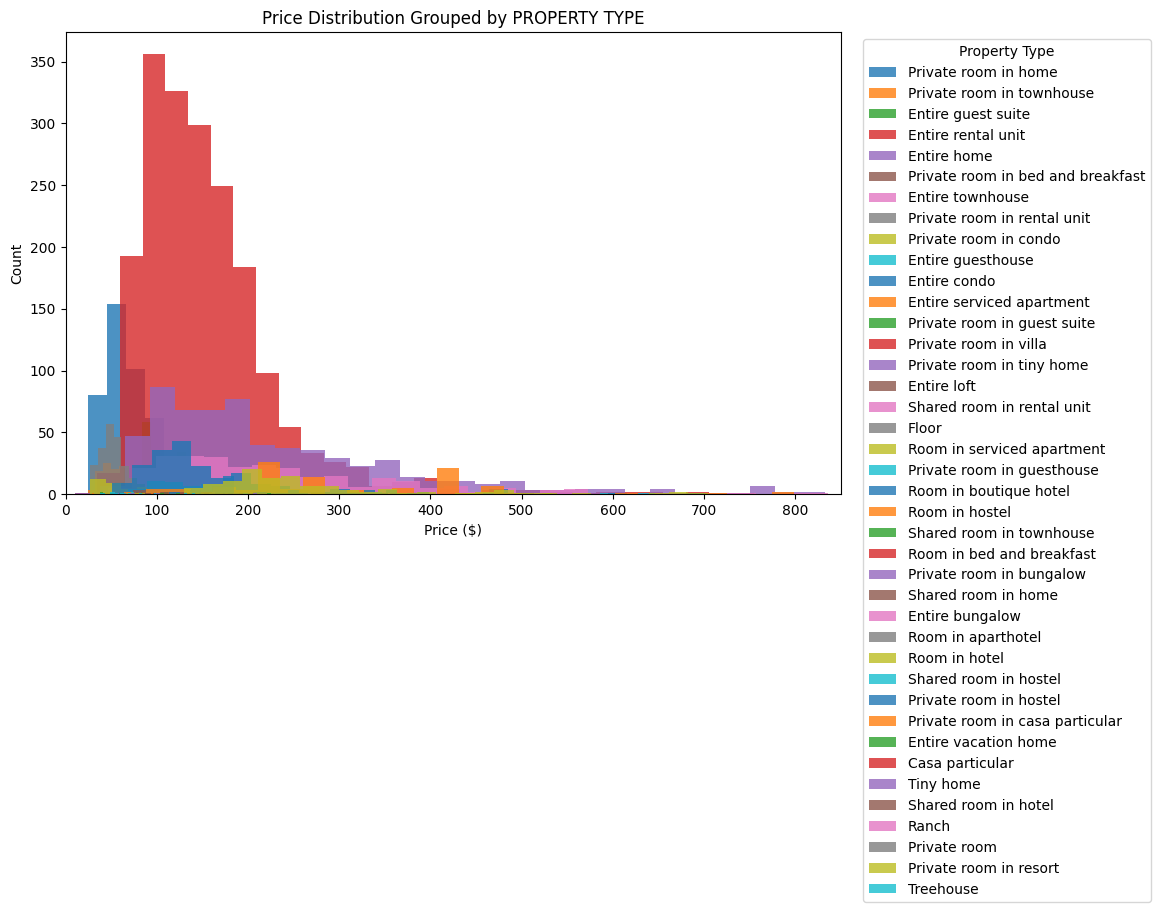

In [ ]:
plot_pricing_distribution('property_type');

### By Accomodates

In [ ]:
get_distribution("accommodates")

,count,mean,std,min,25%,50%,75%,max
accommodates,,,,,,,,
12,35.0,415.657143,176.524776,158.0,252.00,379.0,540.00,763.0
15,3.0,351.666667,174.276600,172.0,267.50,363.0,441.50,520.0
16,12.0,367.916667,206.827314,74.0,228.75,361.0,462.00,717.0
13,3.0,454.666667,302.780999,222.0,283.50,345.0,571.00,797.0
10,64.0,310.937500,134.695645,99.0,222.00,298.0,353.25,765.0
8,156.0,309.480769,143.026570,23.0,207.25,286.0,380.00,811.0
14,11.0,336.272727,175.177676,108.0,238.50,274.0,395.00,704.0
11,7.0,395.714286,266.277245,138.0,205.50,250.0,569.00,833.0
9,29.0,289.551724,150.963001,115.0,185.00,236.0,376.00,713.0


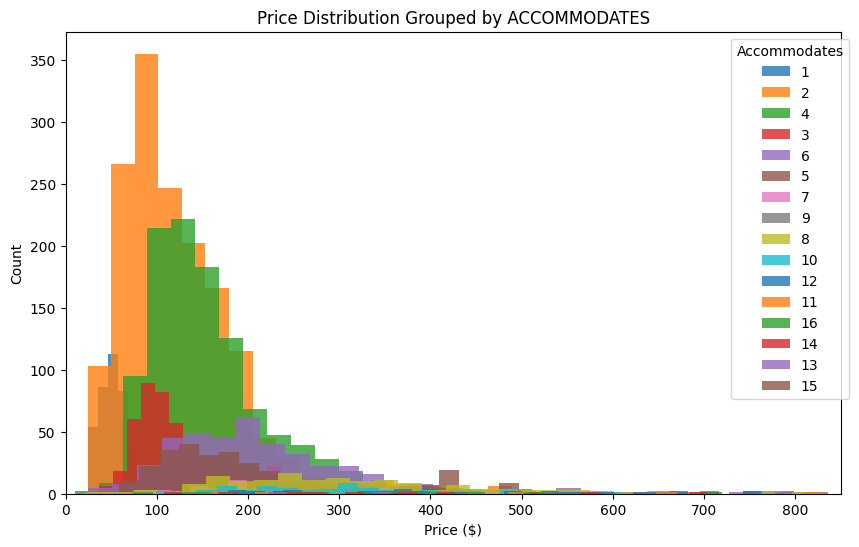

In [ ]:
plot_pricing_distribution('accommodates');

### By Review Scores Rating

In [ ]:
get_distribution("review_scores_rating")

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,,,,,,,,
0.00,1.0,350.0,NaN,350.0,350.00,350.0,350.00,350.0
4.22,2.0,290.5,173.241161,168.0,229.25,290.5,351.75,413.0
3.33,4.0,230.0,62.753486,140.0,210.50,253.5,273.00,273.0
1.00,5.0,207.6,151.841365,42.0,75.00,235.0,273.00,413.0
4.07,1.0,234.0,NaN,234.0,234.00,234.0,234.00,234.0
...,...,...,...,...,...,...,...,...
2.67,1.0,30.0,NaN,30.0,30.00,30.0,30.00,30.0
2.83,1.0,29.0,NaN,29.0,29.00,29.0,29.00,29.0
1.50,1.0,29.0,NaN,29.0,29.00,29.0,29.00,29.0


In [ ]:
listings.assign(
    review_scores = lambda x: np.round(x.review_scores_rating)
).groupby("review_scores").price.describe().sort_values(by="50%", ascending=False
)

,count,mean,std,min,25%,50%,75%,max
review_scores,,,,,,,,
0.0,1.0,350.000000,NaN,350.0,350.00,350.0,350.0,350.0
1.0,5.0,207.600000,151.841365,42.0,75.00,235.0,273.0,413.0
5.0,3591.0,158.952381,106.611678,10.0,92.00,130.0,188.0,836.0
4.0,342.0,137.774854,98.316916,23.0,69.25,109.5,183.5,713.0
3.0,19.0,125.473684,119.628763,29.0,38.50,79.0,168.0,480.0
2.0,10.0,81.600000,64.510464,26.0,32.00,59.5,102.5,205.0


In [ ]:
listings = listings.assign(
    review_scores_rounded = lambda x: np.round(x.review_scores_rating)
)

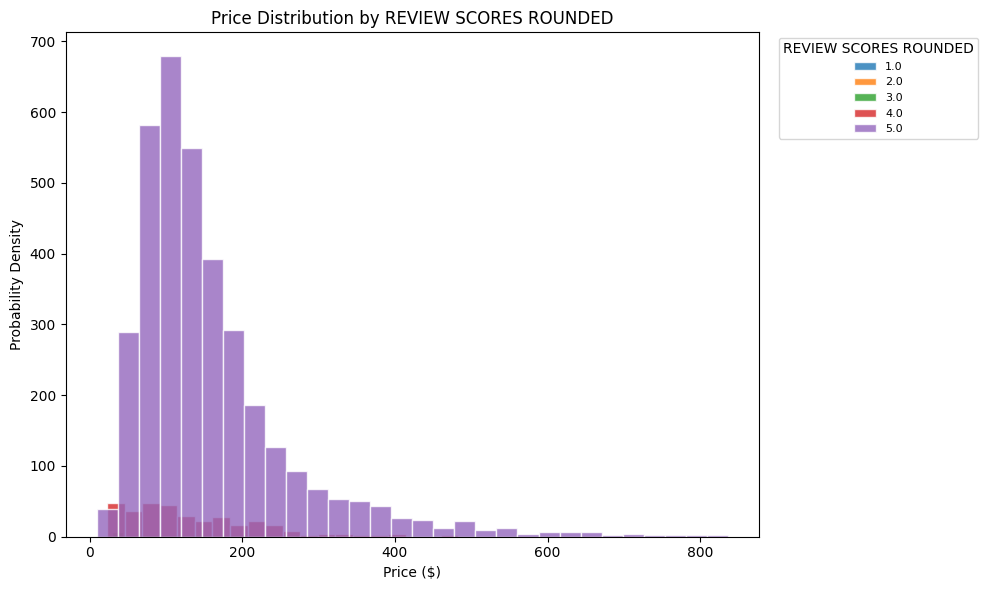

In [ ]:
plot_pricing_dist_v2('review_scores_rounded');

### Explore Any Other Segments Below

In [ ]:
listings.columns

Index(['listing_id', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_since', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_

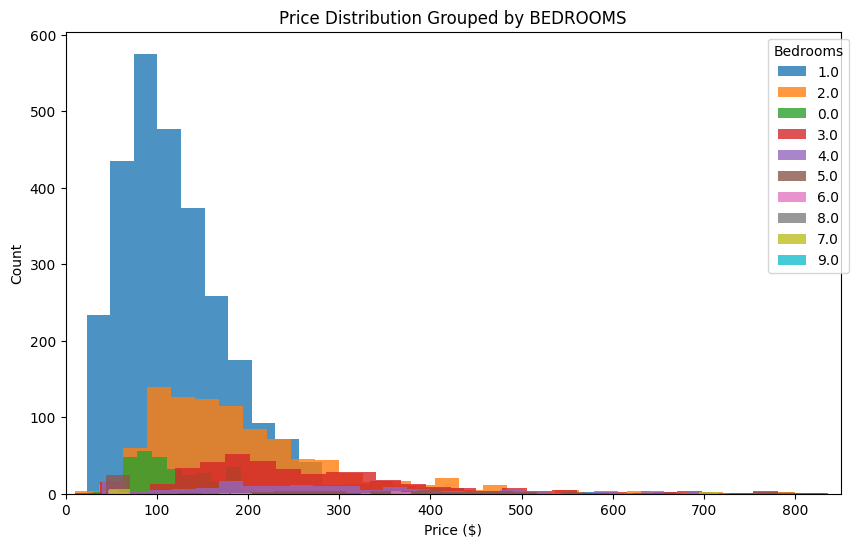

In [ ]:
plot_pricing_distribution('bedrooms');

In [ ]:
listings.bedrooms.value_counts(normalize=True)

,proportion
bedrooms,
1.0,0.593757
2.0,0.200380
3.0,0.084159
0.0,0.067285
4.0,0.033537
5.0,0.014765
6.0,0.002953
7.0,0.001898
8.0,0.001055


In [ ]:
listings.bedrooms.value_counts()

,count
bedrooms,
1.0,2815
2.0,950
3.0,399
0.0,319
4.0,159
5.0,70
6.0,14
7.0,9
8.0,5
